In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# basic import

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection  import RandomizedSearchCV
from catboost import CatBoostRegressor
import warnings

# Data Science Project Lifecycle:

#### 1. Business Understanding:

-   This initial stage revolves aroumd defomomg the business goal and understanding the problem to be solved

#### 2. Data Collection and Understanding :

-  In this stage, all relevant data sources are identified, and the data is explored to understanding its structure and relevance

#### 3. Data Preparation :

-  Data preparation involves cleaning, integrating , treating missing values, handing outlines, and formatting data for analysis

#### 4. Exploratory Data Analysis : 

-  This step inclue gaining insights into the data through visualization and understanding the factors that may affect the model

#### 5. Feature Engineering : 

-  Feature engineering involves selecting, deriving new features, and preparing the data for modeling

#### 6. Modeling : 

-  The modelling phase is where predictive models are built using machine learning algorithsm to solve the busness problem

#### 7. Model Evaluation :

-  After building models, they are rigorously evaluated to select the best-performing model for deployment

#### 8. Model Deployment : 

-  The final step is deploying the selected model in a production environment to make predictions or reccommendations

-  Each stage in the data science lifecylce is critical, and proper execution of these step ensures the success of a data science project

# Business Understanding 

-  The main objective of using the dataset for the project 'The Hourly Engergy Equation : Balancing Supply and Demand in Real Time'is to develop a model that can accurately forecast hourly energy consumption and generation is Spain, balancing supply and demand in real time. this forecasting model will be used to optimize the energy infrastructure and ensure a reliabel and efficient energy supply.

-  This project revolves around a compreshensive dataset spanning four years, capturing crucial insights into Spain's electrical ecosystem.The data amalgamates ourly record of electrical consumption  and generation, settlement prices, and pertinent weather information for the five largest cities in Spain. Source from ENTSOE(Transmission Service Operator Data ) and REE(Red Electric Esparia-Spanish TSO), this dataset not only provides a rich repository of historical information but also includes forecasts by the Trasmission Service Operator(TSO) for both consumption and pricing

-  The dataset is unique because it contains hourly data for electrical consumption and the respective forcasts by the TSO for consumptions and pricing. This allows for a more accurate and detailed analysis of engergy demand and supply patterns, which is essential for  developing a model that can balance supply and demand in real-time.

-  The dataset is publicly availabel via ENTOSE and REE and may be found in the links provided. The inspiration behind using this dataset is the potential for deep learning and machine learning techniques to improve engergy forecasting and contribute to the transition to a renewable-based electrical infrastructure.

# Problem Statement

#####  1. The energy sector is undergoing a radical transformation, with the transition to renewable energy sources and the need to balance supply and demand in real-time becoming increasingly important

##### 2. The main challenges facing the power grid are the integration of bidirectional energy flows, the management of non-dispatchable generation, and the deployment of a digital telecommunications infrastructure that allows control and automation

-  "How can we develop a model that accurately forecasts hourly energy consumption and generation in Spain, balancing supply and demand in real-time, using the provided dataset of electrical consumption, generation, pricing, and weather data for Spain?"

##### 3. The objective is to create a model that can handle the changing demand for electricity and the use of different energy sources in today's fast-changing world, ensuring a reliable and efficient energy supply.

##### 4. This model will be used to optimize the energy infrastructure and maintain a high level of reliability in the power grid

In [3]:
# set pandas display options to show all columns
pd.set_option('display.max_columns',None)

# Data Collection and Understanding

In [4]:
dfw=pd.read_csv(r"D:\PROJECT PORTFOLIO\electricity_prediction\dfw.csv")
dfe=pd.read_csv(r"D:\PROJECT PORTFOLIO\electricity_prediction\dfe.csv")

In [5]:
# Electricity Data

dfe.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [6]:
dfe.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

### data understanding - Short Explanation of columns

### 1. Time (Datatime Index Localized to CET):

-  Represents the temporal aspect of the dataset, with a datetime index localized to Central European Time (CET).

### 2. Fossil Generation

-  Biomass: Biomass generation in MW.
-  Brown Coal/Lignite: Coal/lignite generation in MW.
-  Coal-Derived Gas: Coal gas generation in MW.
-  Fossil Gas: Gas generation in MW.
-  Fossil Hard Coal: Hard coal generation in MW.
-  Fossil Oil: Oil generation in MW.
-  Fossil Oil Shale: Shale oil generation in MW.
-  Fossil Peat: Peat generation in MW.

### 3. Hydro Generation :

-  Pumped Storage Aggregated: Hydro1 generation in MW.
-  Pumped Storage Consumption: Hydro2 generation in MW.
-  Run-of-River and Poundage: Hydro3 generation in MW.
-  Water Reservoir: Hydro4 generation in MW.


### 4. Renewable Generation : 

-  Geothermal: Geothermal generation in MW.
-  Marine: Sea generation in MW.
-  Solar: Solar generation in MW.
-  Waste: Waste generation in MW.
-  Wind Offshore: Wind offshore generation in MW.
-  Wind Onshore: Wind onshore generation in MW.

### 5. Forecast Solar Day Ahead :

-  Reflects the forecasted solar generation, providing an estimate of solar electricity generation for the next day.

### 6. Forecast Wind Offshore Edaay Ahead : 

-  Represents the forecasted offshore wind generation, offering an estimate of offshore wind electricity generation for the next day.

### 7. Forecast Wind Onshore Day Ahead :

-  Indicates the forecasted onshore wind generation, offering an estimate of onshore wind electricity generation for the next day.

### 8. Total Land Forecast :

-  Indicates the forecasted onshore wind generation, offering an estimate of onshore wind electricity generation for the next day.

### 9. Total Load Actual : 

-  Quantifies the actual electrical demand, indicating the real-time total electricity demand for a specific period.

### 10. Price Day Ahead :

-  Represents the forecasted electricity price in euros per megawatt-hour (EUR/MWh) for a specific period.

### 11. Price Actual : 

-  Indicates the actual electricity price in euros per megawatt-hour (EUR/MWh) for a specific period.

In [7]:
# WEATHER DATA
dfw.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [8]:
dfw.columns

Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

### Data Understanding  - Short Explanation of Columns :

### 1. DateTime and Locations :

-  dt_iso: Datetime index localized to CET.
-  city_name: Name of the city.

### 2. Temperature and Pressure : 

-  temp: Temperature in Kelvin.
-  temp_min: Minimum temperature in Kelvin.
-  temp_max: Maximum temperature in Kelvin.
-  pressure: Atmospheric pressure in hPa.

### 3. Humidity and Wind : 

-  humidity: Humidity in percentage.
-  wind_speed: Wind speed in m/s.
-  wind_deg: Wind direction.

### 4. Precipitaion and Snow :

-  rain_1h: Rain in the last hour in mm.
-  rain_3h: Rain in the last 3 hours in mm.
-  snow_3h: Snow in the last 3 hours in mm.

### 5. Cloud Cover and Weather Descrpition : 

-  clouds_all: Cloud cover in percentage.
-  weather_id: Code used to describe weather.
-  weather_main: Short description of current weather.
-  weather_description: Long description of current weather.
-  weather_icon: Weather icon code for the website.

# Data Explorationa and Preparation 

In [9]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [10]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [11]:
# change datetime

dfw['dt_iso']=pd.to_datetime(dfw['dt_iso'],errors='coerce',utc=True)
dfe['time']=pd.to_datetime(dfe['time'],errors='coerce',utc=True)

In [12]:
# merge the two dataset

# here 'time ' and 'dt_iso' are common columns

merged_df=pd.merge(dfe,dfw,left_on='time',right_on='dt_iso',how='inner')

In [13]:

 merged_df

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,2014-12-31 23:00:00+00:00,Valencia,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,2014-12-31 23:00:00+00:00,Madrid,267.325000,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,2014-12-31 23:00:00+00:00,Bilbao,269.657312,269.657312,269.657312,1036,97,0,226,0.0,0.0,0.0,0,800,clear,sky is clear,01
3,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,2014-12-31 23:00:00+00:00,Barcelona,281.625000,281.625000,281.625000,1035,100,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,2014-12-31 23:00:00+00:00,Seville,273.375000,273.375000,273.375000,1039,75,1,21,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 22:00:00+00:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,NaN,108.0,1069.0,1686.0,0.0,6075.0,61.0,92.0,31.0,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88,2018-12-31 22:00:00+00:00,Valencia,279.140000,278.150000,280.150000,1029,75,2,300,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,2018-12-31 22:00:00+00:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,NaN,108.0,1069.0,1686.0,0.0,6075.0,61.0,92.0,31.0,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88,2018-12-31 22:00:00+00:00,Madrid,275.150000,275.150000,275.150000,1031,74,1,360,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,2018-12-31 22:00:00+00:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,NaN,108.0,1069.0,1686.0,0.0,6075.0,61.0,92.0,31.0,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88,2018-12-31 22:00:00+00:00,Bilbao,275.600000,275.150000,276.150000,1034,93,2,100,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 22:00:00+00:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,NaN,108.0,1069.0,1686.0,0.0,6075.0,61.0,92.0,31.0,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88,2018-12-31 22:00:00+00:00,Barcelona,280.130000,277.150000,283.150000,1028,100,5,310,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [14]:
# if the common column is no longder needed, you can drop it

merged_df=merged_df.drop(['dt_iso'],axis=1)

In [15]:
merged_df

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,Valencia,270.475000,270.475000,270.475000,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,Madrid,267.325000,267.325000,267.325000,971,63,1,309,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,Bilbao,269.657312,269.657312,269.657312,1036,97,0,226,0.0,0.0,0.0,0,800,clear,sky is clear,01
3,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,Barcelona,281.625000,281.625000,281.625000,1035,100,7,58,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,Seville,273.375000,273.375000,273.375000,1039,75,1,21,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 22:00:00+00:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,NaN,108.0,1069.0,1686.0,0.0,6075.0,61.0,92.0,31.0,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88,Valencia,279.140000,278.150000,280.150000,1029,75,2,300,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,2018-12-31 22:00:00+00:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,NaN,108.0,1069.0,1686.0,0.0,6075.0,61.0,92.0,31.0,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88,Madrid,275.150000,275.150000,275.150000,1031,74,1,360,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,2018-12-31 22:00:00+00:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,NaN,108.0,1069.0,1686.0,0.0,6075.0,61.0,92.0,31.0,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88,Bilbao,275.600000,275.150000,276.150000,1034,93,2,100,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 22:00:00+00:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,NaN,108.0,1069.0,1686.0,0.0,6075.0,61.0,92.0,31.0,287.0,0.0,3651.0,26.0,NaN,3117.0,24424.0,24455.0,64.27,69.88,Barcelona,280.130000,277.150000,283.150000,1028,100,5,310,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [16]:
merged_df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed',

In [17]:
duplicate_count=merged_df.duplicated(subset=['time']).sum()

# print the count of duplicates
print('Number of Duplicated based on time columns : ',duplicate_count)


Number of Duplicated based on time columns :  143332


In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178396 entries, 0 to 178395
Data columns (total 45 columns):
 #   Column                                       Non-Null Count   Dtype              
---  ------                                       --------------   -----              
 0   time                                         178396 non-null  datetime64[ns, UTC]
 1   generation biomass                           178301 non-null  float64            
 2   generation fossil brown coal/lignite         178306 non-null  float64            
 3   generation fossil coal-derived gas           178306 non-null  float64            
 4   generation fossil gas                        178306 non-null  float64            
 5   generation fossil hard coal                  178306 non-null  float64            
 6   generation fossil oil                        178301 non-null  float64            
 7   generation fossil oil shale                  178306 non-null  float64            
 8   generation fos

In [19]:
# droping duplicate

merged_df=merged_df.drop_duplicates(subset=['time'])

In [20]:
merged_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
5,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
10,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
15,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
20,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [21]:
# describing the datasets
merged_df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,35045.000000,35045.000000,35046.000000,35045.0,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,475.577343,972.116108,2605.114735,0.0,6263.907039,60.228585,85.639702,1432.665925,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023,290.783954,290.225644,291.357900,1015.979381,65.093971,2.692477,160.801648,0.034458,0.000227,0.000154,20.740475,782.171800
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,792.406614,400.777536,1835.199745,0.0,839.667958,20.238381,14.077554,1680.119887,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083,7.234569,7.090499,7.523438,11.937650,19.678281,2.582959,120.412607,0.263594,0.003535,0.011912,25.604016,76.809176
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000,268.830656,268.830656,268.830656,969.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,0.000000,637.000000,1077.250000,0.0,5760.000000,53.000000,73.000000,71.000000,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500,285.150000,285.150000,285.650000,1012.000000,51.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,68.000000,906.000000,2164.000000,0.0,6566.000000,57.000000,88.000000,616.000000,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000,290.190000,290.150000,291.150000,1017.000000,67.000000,2.000000,130.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,616.000000,1250.000000,3757.000000,0.0,7025.000000,80.000000,97.000000,2578.000000,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000,296.150000,295.370000,297.150000,1021.000000,82.000000,4.000000,280.000000,0.000000,0.000000,0.000000,20.000000,801.000000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,4523.000000,2000.000000,9728.000000,0.0,7117.000000,106.000000,119.000000,5792.000000,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000,311.150000,311.150000,314.820000,1087.000000,100.000000,133.000000,360.000000,12.000000,0.100000,1.125000,100.000000,804.000000


In [22]:
# select specifined columns in the dataset

new_columns=['time', 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil','generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage','generation hydro water reservoir','generation nuclear', 
        'generation other', 'generation other renewable','generation solar', 'generation waste','generation wind onshore',
        'total load actual','price actual','temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed','clouds_all',
        'weather_main']



In [23]:

merged_new=merged_df.loc[:,new_columns]

In [24]:
merged_new

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,270.475,270.475,1001,77,1,0,clear
5,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,270.475,270.475,1001,77,1,0,clear
10,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,269.686,269.686,1002,78,0,0,clear
15,2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,269.686,269.686,1002,78,0,0,clear
20,2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,269.686,269.686,1002,78,0,0,clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178371,2018-12-31 18:00:00+00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0,77.02,285.150,286.150,1028,62,2,0,clear
178376,2018-12-31 19:00:00+00:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,29735.0,76.16,282.150,284.150,1029,71,1,0,clear
178381,2018-12-31 20:00:00+00:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,28071.0,74.30,281.150,282.150,1029,81,3,0,clear
178386,2018-12-31 21:00:00+00:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,93.0,31.0,287.0,3586.0,25801.0,69.89,279.150,281.150,1029,81,2,0,clear


In [25]:
merged_new.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all
count,35045.000000,35046.000000,35046.000000,35046.000000,35045.000000,35045.000000,35045.000000,35046.000000,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.000000,35028.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.513540,448.059208,5622.737488,4256.065742,298.319789,475.577343,972.116108,2605.114735,6263.907039,60.228585,85.639702,1432.665925,269.452133,5464.479769,28696.939905,57.884023,290.225644,291.357900,1015.979381,65.093971,2.692477,20.740475
std,85.353943,354.568590,2201.830478,1961.601013,52.520673,792.406614,400.777536,1835.199745,839.667958,20.238381,14.077554,1680.119887,50.195536,3213.691587,4574.987950,14.204083,7.090499,7.523438,11.937650,19.678281,2.582959,25.604016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18041.000000,9.330000,268.830656,268.830656,969.000000,8.000000,0.000000,0.000000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1077.250000,5760.000000,53.000000,73.000000,71.000000,240.000000,2933.000000,24807.750000,49.347500,285.150000,285.650000,1012.000000,51.000000,1.000000,0.000000
50%,367.000000,509.000000,4969.000000,4474.000000,300.000000,68.000000,906.000000,2164.000000,6566.000000,57.000000,88.000000,616.000000,279.000000,4849.000000,28901.000000,58.020000,290.150000,291.150000,1017.000000,67.000000,2.000000,20.000000
75%,433.000000,757.000000,6429.000000,5838.750000,330.000000,616.000000,1250.000000,3757.000000,7025.000000,80.000000,97.000000,2578.000000,310.000000,7398.000000,32192.000000,68.010000,295.370000,297.150000,1021.000000,82.000000,4.000000,20.000000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,41015.000000,116.800000,311.150000,314.820000,1087.000000,100.000000,133.000000,100.000000


In [26]:
# extract date and hour components

merged_new['date']=merged_new['time'].dt.date
merged_new['hour']=merged_new['time'].dt.hour

# Extract months, week and day
merged_new['month']=merged_new['time'].dt.month
merged_new['week']=merged_new['time'].dt.isocalendar().week
merged_new['day']=merged_new['time'].dt.day
merged_new['year']=merged_new['time'].dt.year

In [27]:
merged_new=merged_new.drop(columns=['time'])

In [28]:
# recording the columns

merged_new=merged_new[['date','year','month','week','day','hour']
                    + [col for col in merged_new.columns if col not in 
                      ['date','year','month','week','day','hour']]]

In [29]:
merged_new

,date,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main
0,2014-12-31,2014,12,1,31,23,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,270.475,270.475,1001,77,1,0,clear
5,2015-01-01,2015,1,1,1,0,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,270.475,270.475,1001,77,1,0,clear
10,2015-01-01,2015,1,1,1,1,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,269.686,269.686,1002,78,0,0,clear
15,2015-01-01,2015,1,1,1,2,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,269.686,269.686,1002,78,0,0,clear
20,2015-01-01,2015,1,1,1,3,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,269.686,269.686,1002,78,0,0,clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178371,2018-12-31,2018,12,1,31,18,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0,77.02,285.150,286.150,1028,62,2,0,clear
178376,2018-12-31,2018,12,1,31,19,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,29735.0,76.16,282.150,284.150,1029,71,1,0,clear
178381,2018-12-31,2018,12,1,31,20,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,28071.0,74.30,281.150,282.150,1029,81,3,0,clear
178386,2018-12-31,2018,12,1,31,21,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,93.0,31.0,287.0,3586.0,25801.0,69.89,279.150,281.150,1029,81,2,0,clear


# Exploratory Data Analysis

In [30]:
# create a copy of the original dataframe
df_eda=merged_new.copy()

# perform eda on copied dataframe 
df_eda

,date,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main
0,2014-12-31,2014,12,1,31,23,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,270.475,270.475,1001,77,1,0,clear
5,2015-01-01,2015,1,1,1,0,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,270.475,270.475,1001,77,1,0,clear
10,2015-01-01,2015,1,1,1,1,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,269.686,269.686,1002,78,0,0,clear
15,2015-01-01,2015,1,1,1,2,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,269.686,269.686,1002,78,0,0,clear
20,2015-01-01,2015,1,1,1,3,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,269.686,269.686,1002,78,0,0,clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178371,2018-12-31,2018,12,1,31,18,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0,77.02,285.150,286.150,1028,62,2,0,clear
178376,2018-12-31,2018,12,1,31,19,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,29735.0,76.16,282.150,284.150,1029,71,1,0,clear
178381,2018-12-31,2018,12,1,31,20,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,28071.0,74.30,281.150,282.150,1029,81,3,0,clear
178386,2018-12-31,2018,12,1,31,21,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,93.0,31.0,287.0,3586.0,25801.0,69.89,279.150,281.150,1029,81,2,0,clear


In [31]:
df_eda.describe()

,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all
count,35064.000000,35064.000000,35064.0,35064.000000,35064.000000,35045.000000,35046.000000,35046.000000,35046.000000,35045.000000,35045.000000,35045.000000,35046.000000,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.000000,35028.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,2016.499544,6.522930,26.661875,15.729637,11.500000,383.513540,448.059208,5622.737488,4256.065742,298.319789,475.577343,972.116108,2605.114735,6263.907039,60.228585,85.639702,1432.665925,269.452133,5464.479769,28696.939905,57.884023,290.225644,291.357900,1015.979381,65.093971,2.692477,20.740475
std,1.117795,3.448752,15.064325,8.800218,6.922285,85.353943,354.568590,2201.830478,1961.601013,52.520673,792.406614,400.777536,1835.199745,839.667958,20.238381,14.077554,1680.119887,50.195536,3213.691587,4574.987950,14.204083,7.090499,7.523438,11.937650,19.678281,2.582959,25.604016
min,2014.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18041.000000,9.330000,268.830656,268.830656,969.000000,8.000000,0.000000,0.000000
25%,2016.000000,4.000000,14.0,8.000000,5.750000,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1077.250000,5760.000000,53.000000,73.000000,71.000000,240.000000,2933.000000,24807.750000,49.347500,285.150000,285.650000,1012.000000,51.000000,1.000000,0.000000
50%,2016.000000,7.000000,27.0,16.000000,11.500000,367.000000,509.000000,4969.000000,4474.000000,300.000000,68.000000,906.000000,2164.000000,6566.000000,57.000000,88.000000,616.000000,279.000000,4849.000000,28901.000000,58.020000,290.150000,291.150000,1017.000000,67.000000,2.000000,20.000000
75%,2017.000000,10.000000,40.0,23.000000,17.250000,433.000000,757.000000,6429.000000,5838.750000,330.000000,616.000000,1250.000000,3757.000000,7025.000000,80.000000,97.000000,2578.000000,310.000000,7398.000000,32192.000000,68.010000,295.370000,297.150000,1021.000000,82.000000,4.000000,20.000000
max,2018.000000,12.000000,53.0,31.000000,23.000000,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,41015.000000,116.800000,311.150000,314.820000,1087.000000,100.000000,133.000000,100.000000


In [32]:
df_eda.to_csv('df_eda.csv',index=False)

In [33]:
# assuming df_eda is a our dataframe
unique_weather_categories=df_eda['weather_main'].unique()

print('Unique Weather Categories  : ', unique_weather_categories)

Unique Weather Categories  :  ['clear' 'clouds' 'rain' 'mist' 'thunderstorm' 'drizzle' 'fog' 'smoke'
 'haze']


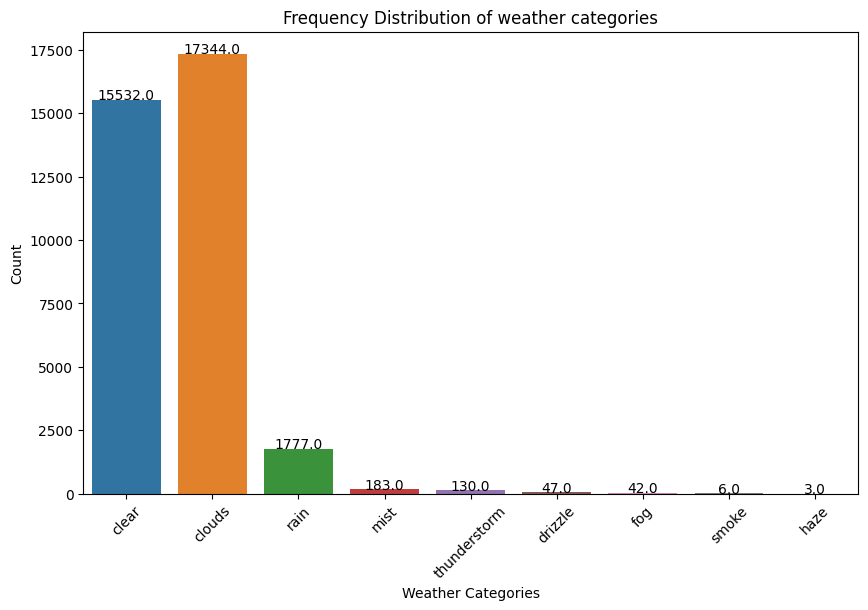

In [34]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='weather_main',data=df_eda)
plt.title('Frequency Distribution of weather categories')
plt.xlabel('Weather Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

# add count labels on top of each bar

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='baseline')
plt.show()

In [35]:
df_eda['weather_main']=df_eda['weather_main'].replace({
    'mist':'clouds',
    'thunderstorm':'rain',
    'drizzle':'rain',
    'fog':'clouds',
    'smoke':'clear',
    'haze':'clouds'
})

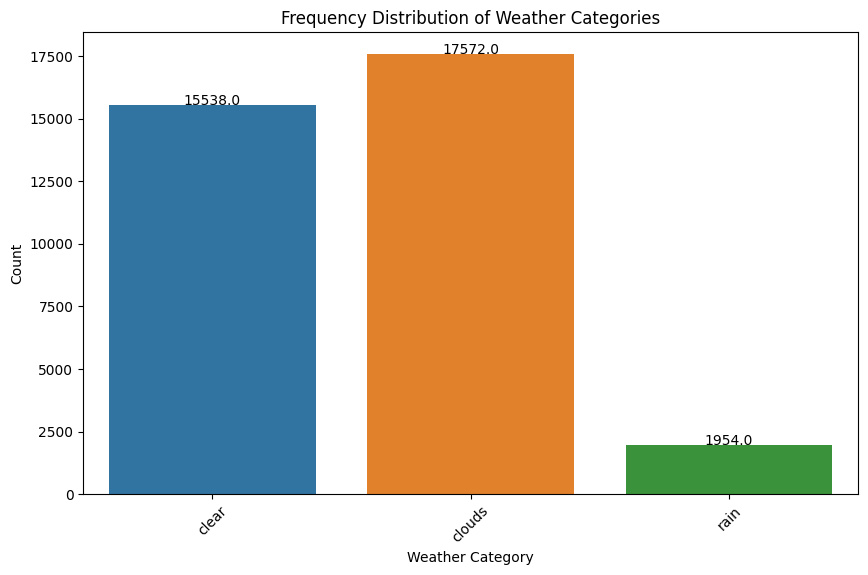

In [36]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='weather_main',data=df_eda)
plt.title('Frequency Distribution of Weather Categories')
plt.xlabel('Weather Category')
plt.ylabel('Count')
plt.xticks(rotation=45)


# add count labels on top of each bar

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width()/2., p.get_height()),ha='center',va='baseline')
plt.show()

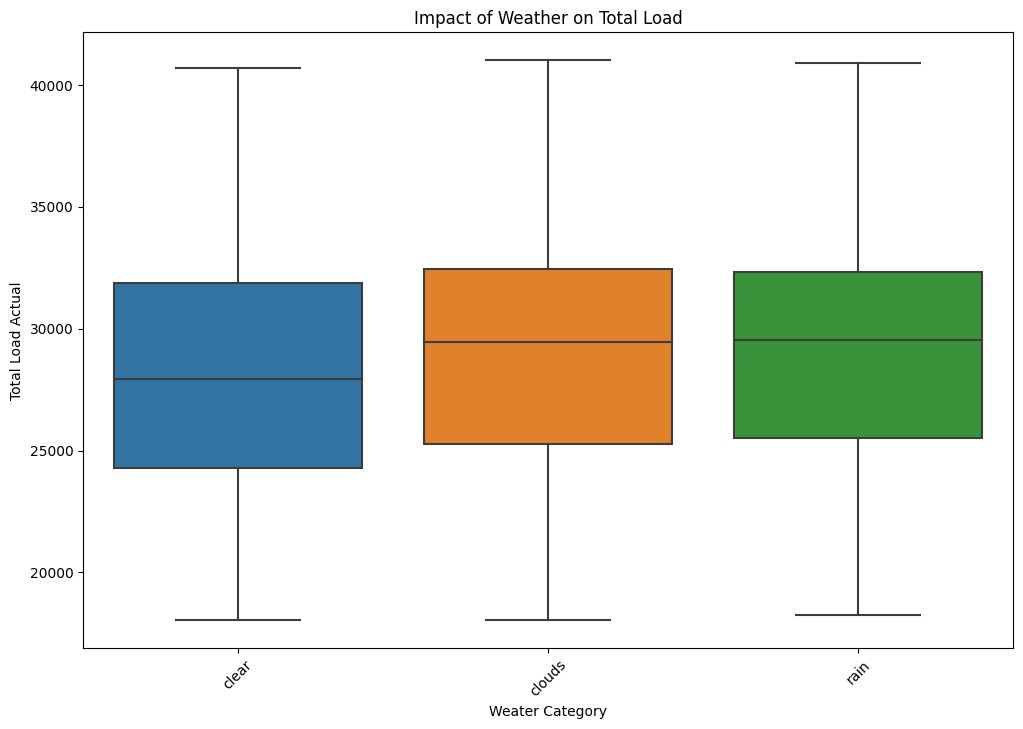

In [37]:
plt.figure(figsize=(12,8))
sns.boxplot(x='weather_main',y='total load actual',data=df_eda)
plt.title('Impact of Weather on Total Load')
plt.xlabel('Weater Category')
plt.ylabel('Total Load Actual')
plt.xticks(rotation=45)
plt.show()

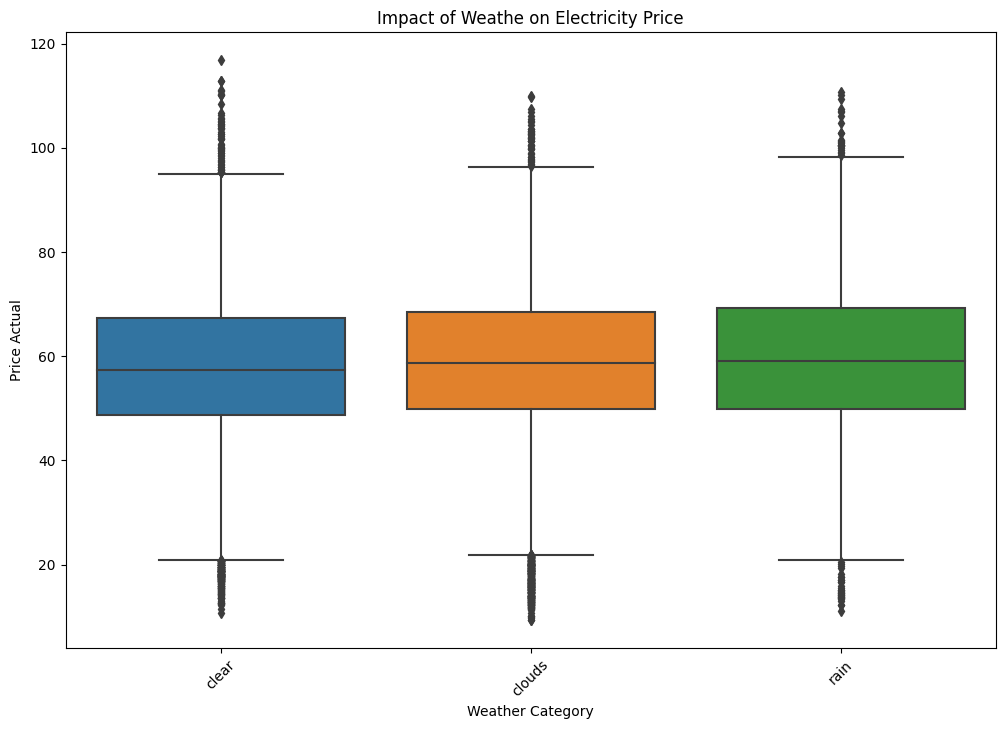

In [38]:
plt.figure(figsize=(12,8))
sns.boxplot(x='weather_main',y='price actual',data=df_eda)
plt.title('Impact of Weathe on Electricity Price')
plt.xlabel('Weather Category')
plt.ylabel('Price Actual')
plt.xticks(rotation=45)
plt.show()

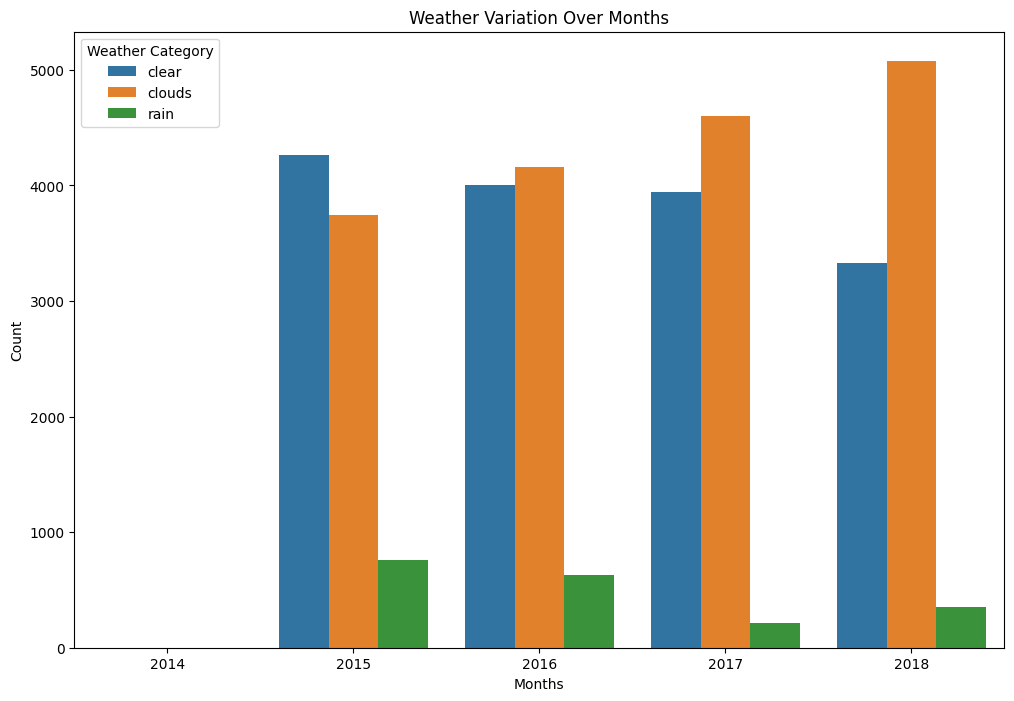

In [39]:
plt.figure(figsize=(12,8))
sns.countplot(x='year',hue='weather_main',data=df_eda)
plt.title('Weather Variation Over Months')
plt.xlabel('Months')
plt.ylabel('Count')
plt.legend(title='Weather Category')
plt.show()

C:\Users\sachin gavalkar\AppData\Local\Temp\ipykernel_17596\3950325178.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather_corr=df_eda.groupby('weather_main').mean().corr()


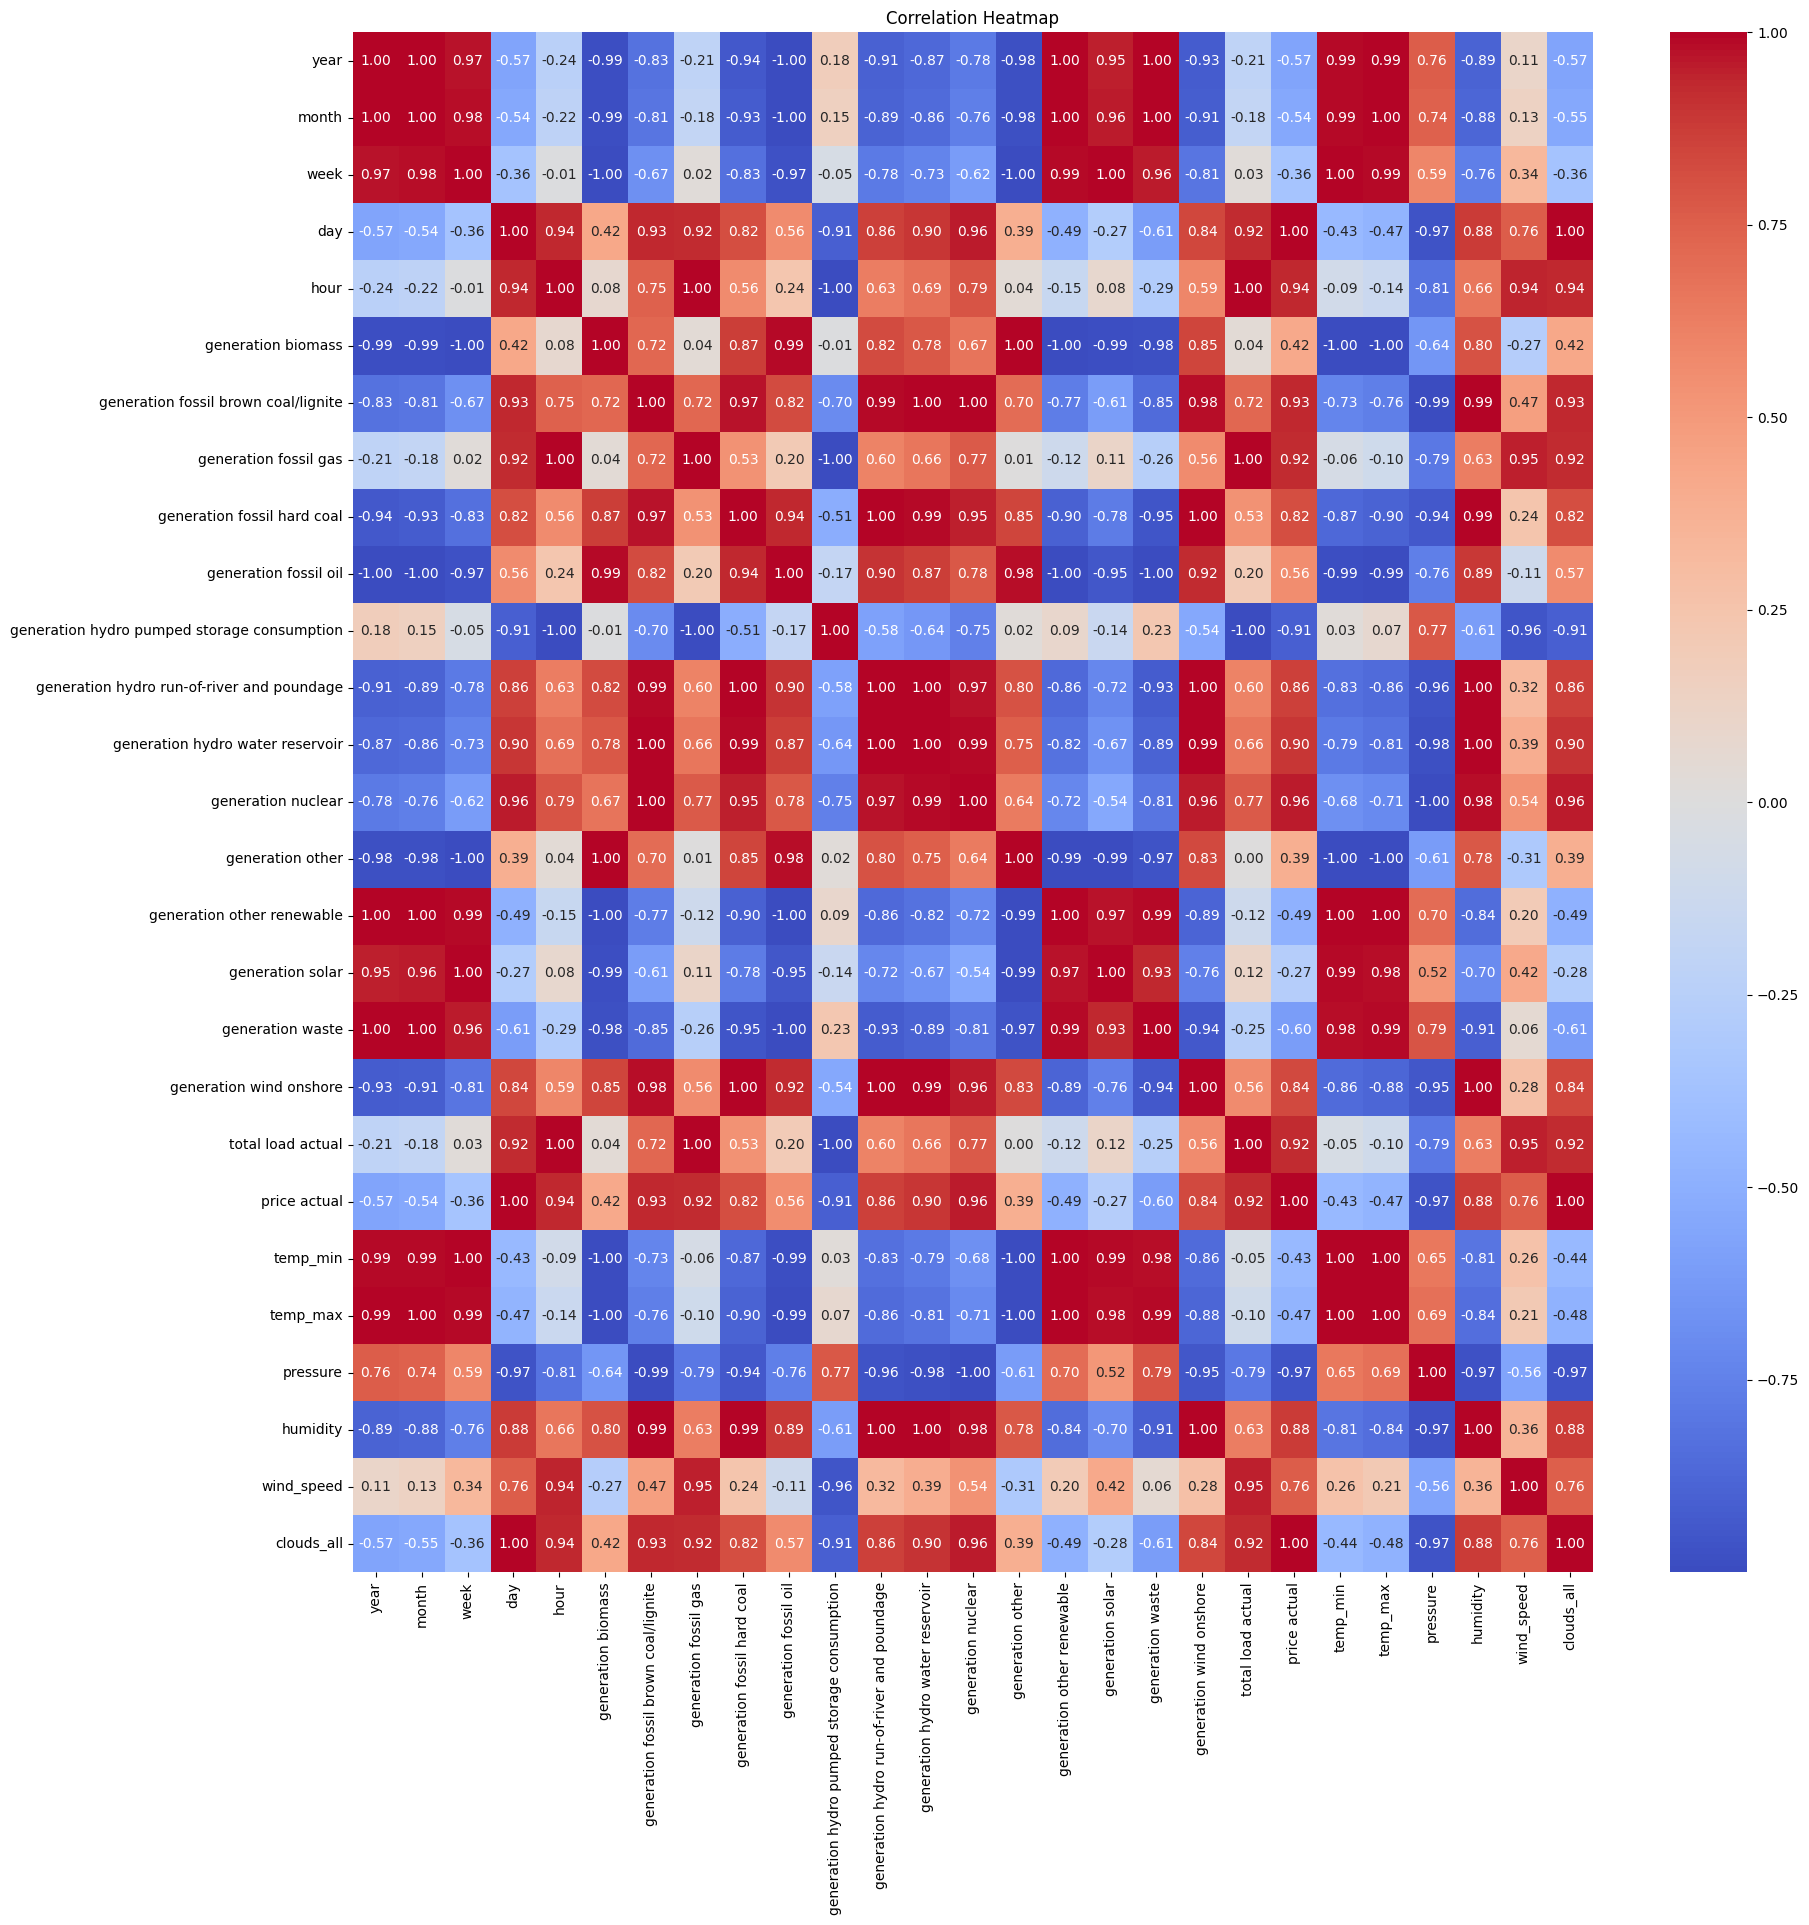

In [40]:
weather_corr=df_eda.groupby('weather_main').mean().corr()
plt.figure(figsize=(20,20))
sns.heatmap(weather_corr,annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

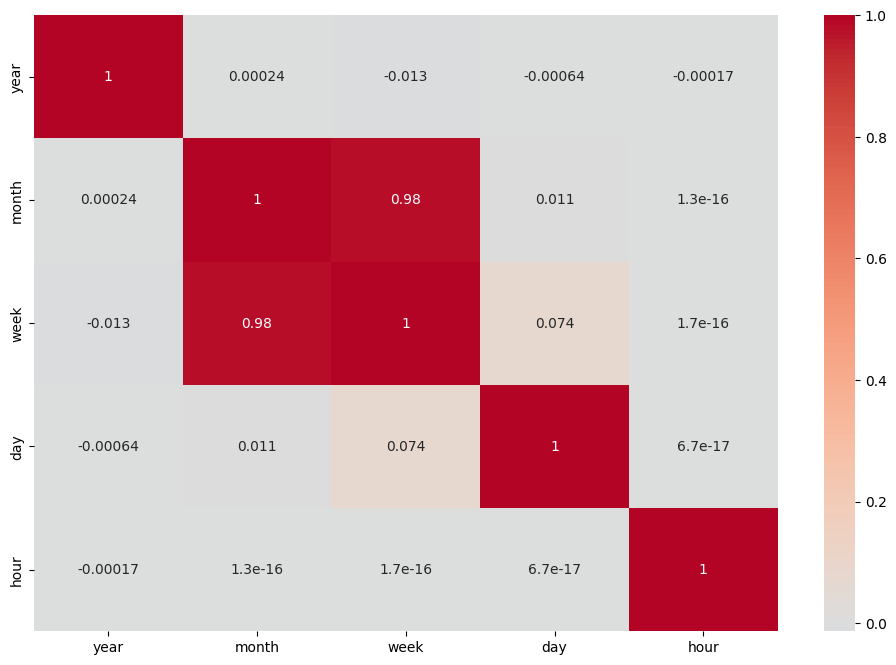

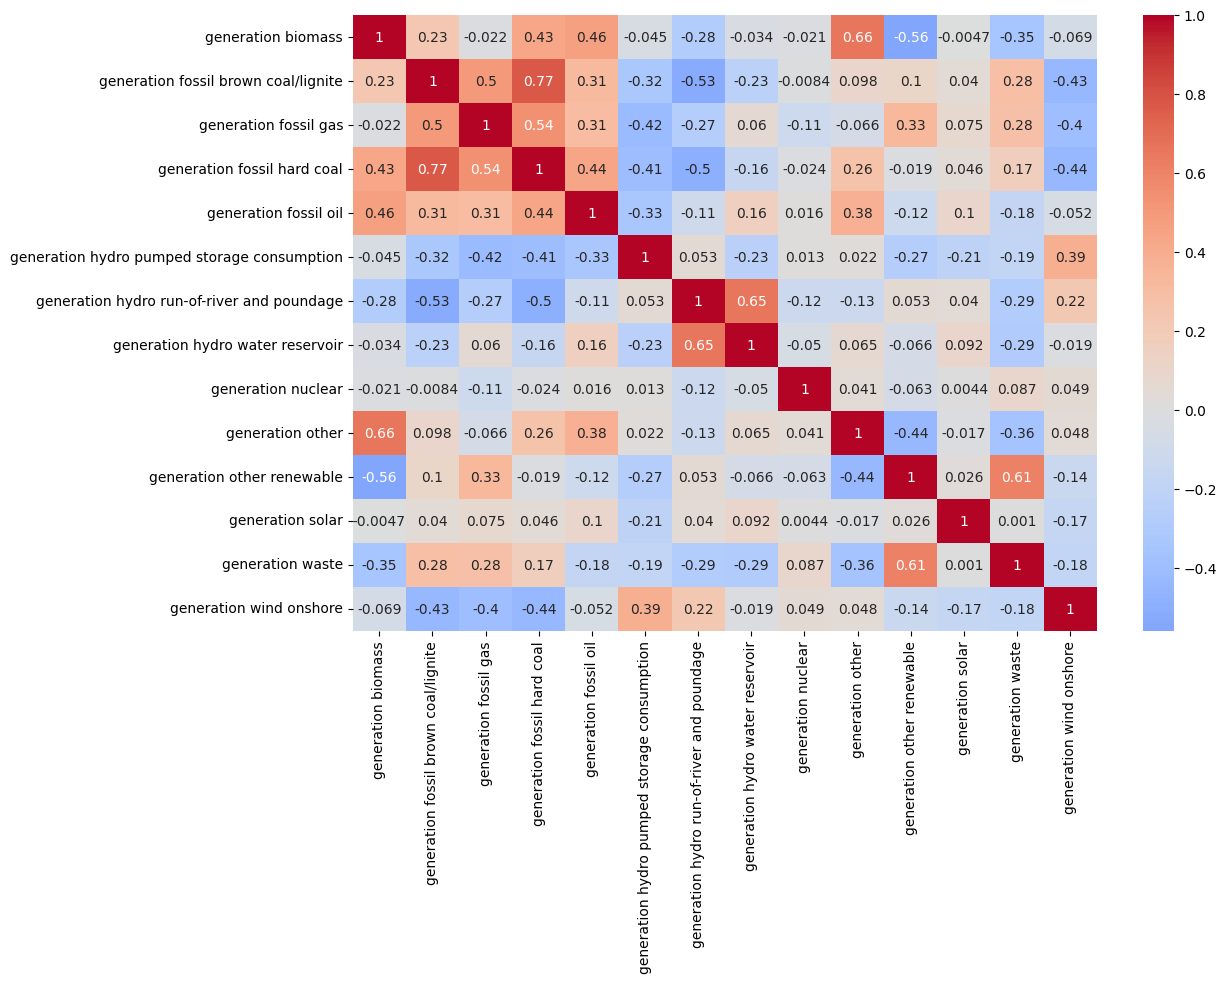

C:\Users\sachin gavalkar\AppData\Local\Temp\ipykernel_17596\2484240008.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_eda[group].corr(), annot=True, cmap='coolwarm',center=0)


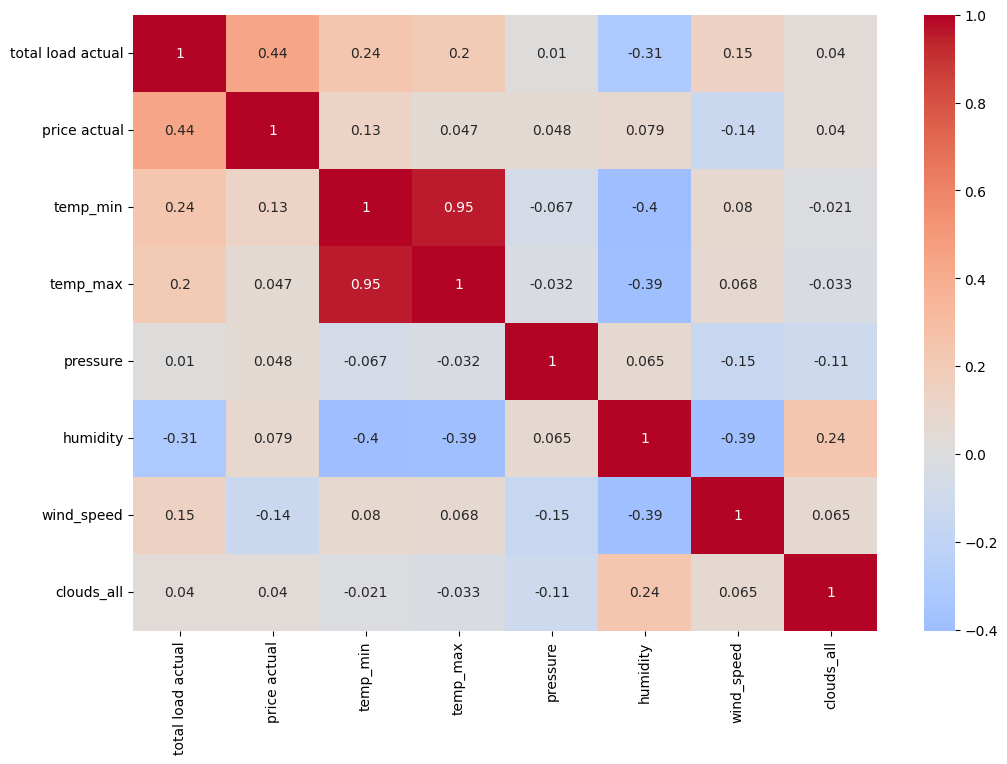

In [41]:
# list of groups based on variables
groups = [['year', 'month', 'week', 'day', 'hour'],
          ['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
           'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption',
           'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear',
           'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'generation wind onshore'],
          ['total load actual', 'price actual', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'clouds_all', 'weather_main']]



# plot  heatmap for each group

for group in groups:
    plt.figure(figsize=(12,8))
    sns.heatmap(df_eda[group].corr(), annot=True, cmap='coolwarm',center=0)
    plt.show()

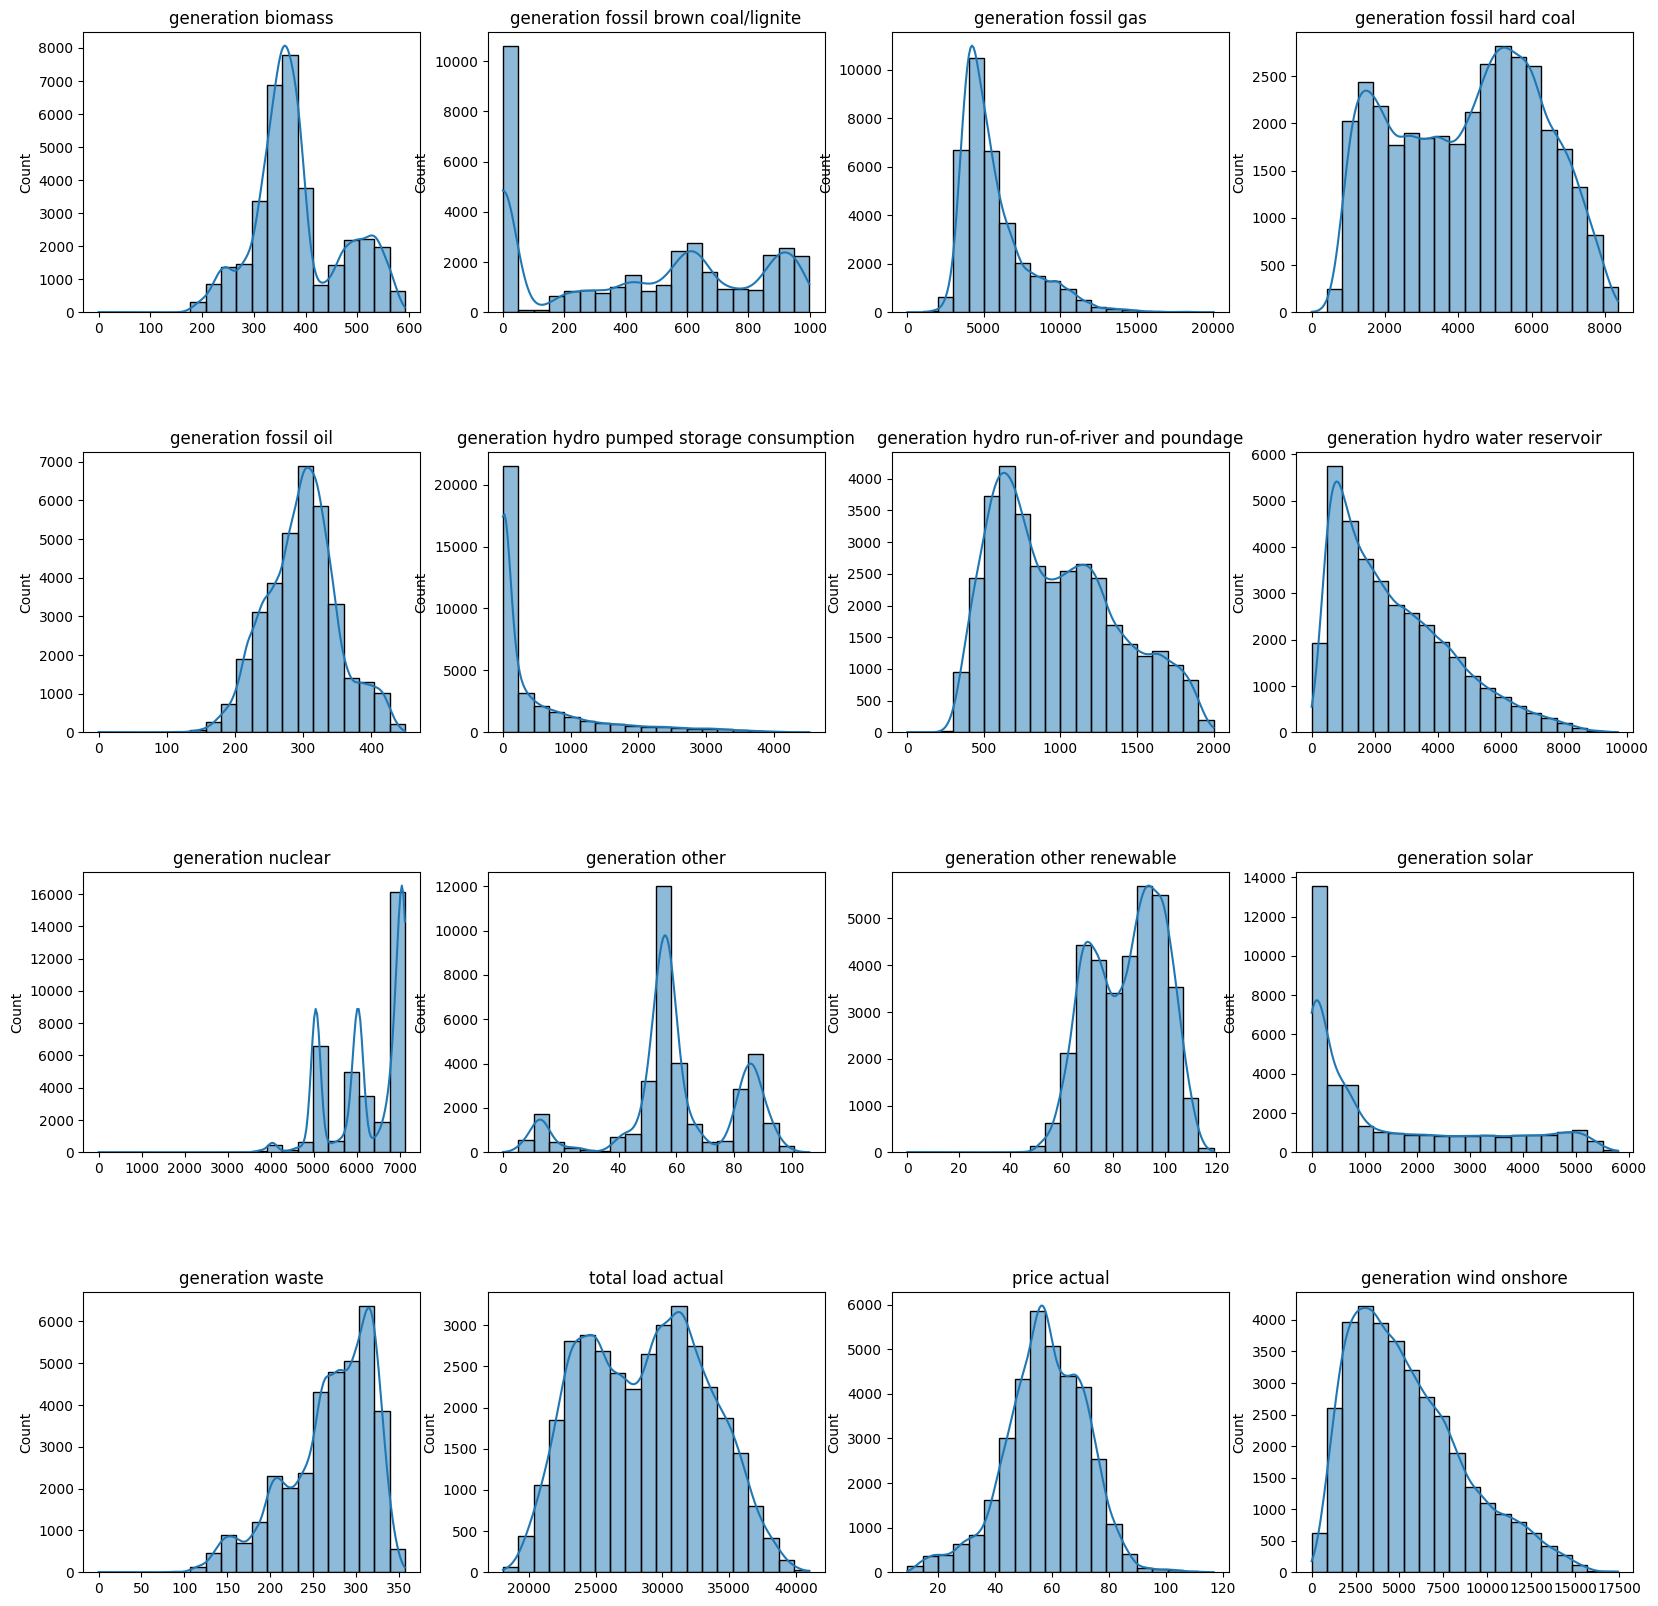

In [42]:
# Selecting columns for the subplot
selected_columns = ['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
                    'generation fossil hard coal', 'generation fossil oil',
                    'generation hydro pumped storage consumption',
                    'generation hydro run-of-river and poundage', 'generation hydro water reservoir',
                    'generation nuclear', 'generation other', 'generation other renewable', 'generation solar',
                    'generation waste', 'total load actual', 'price actual', 'generation wind onshore']

# Set the number of columns and rows for the subplot
num_cols = 4
num_rows = (len(selected_columns) - 1) // num_cols + 1

# Create a subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array to handle the case when there's only one row or column
axes = axes.flatten()

# Plot histograms for each selected column
for i, col in enumerate(selected_columns):
    sns.histplot(df_eda[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(None)

# Hide any empty subplots if the number of selected columns is not a multiple of num_cols
for j in range(len(selected_columns), num_rows * num_cols):
    fig.delaxes(axes[j])

# Show the plot
plt.show()

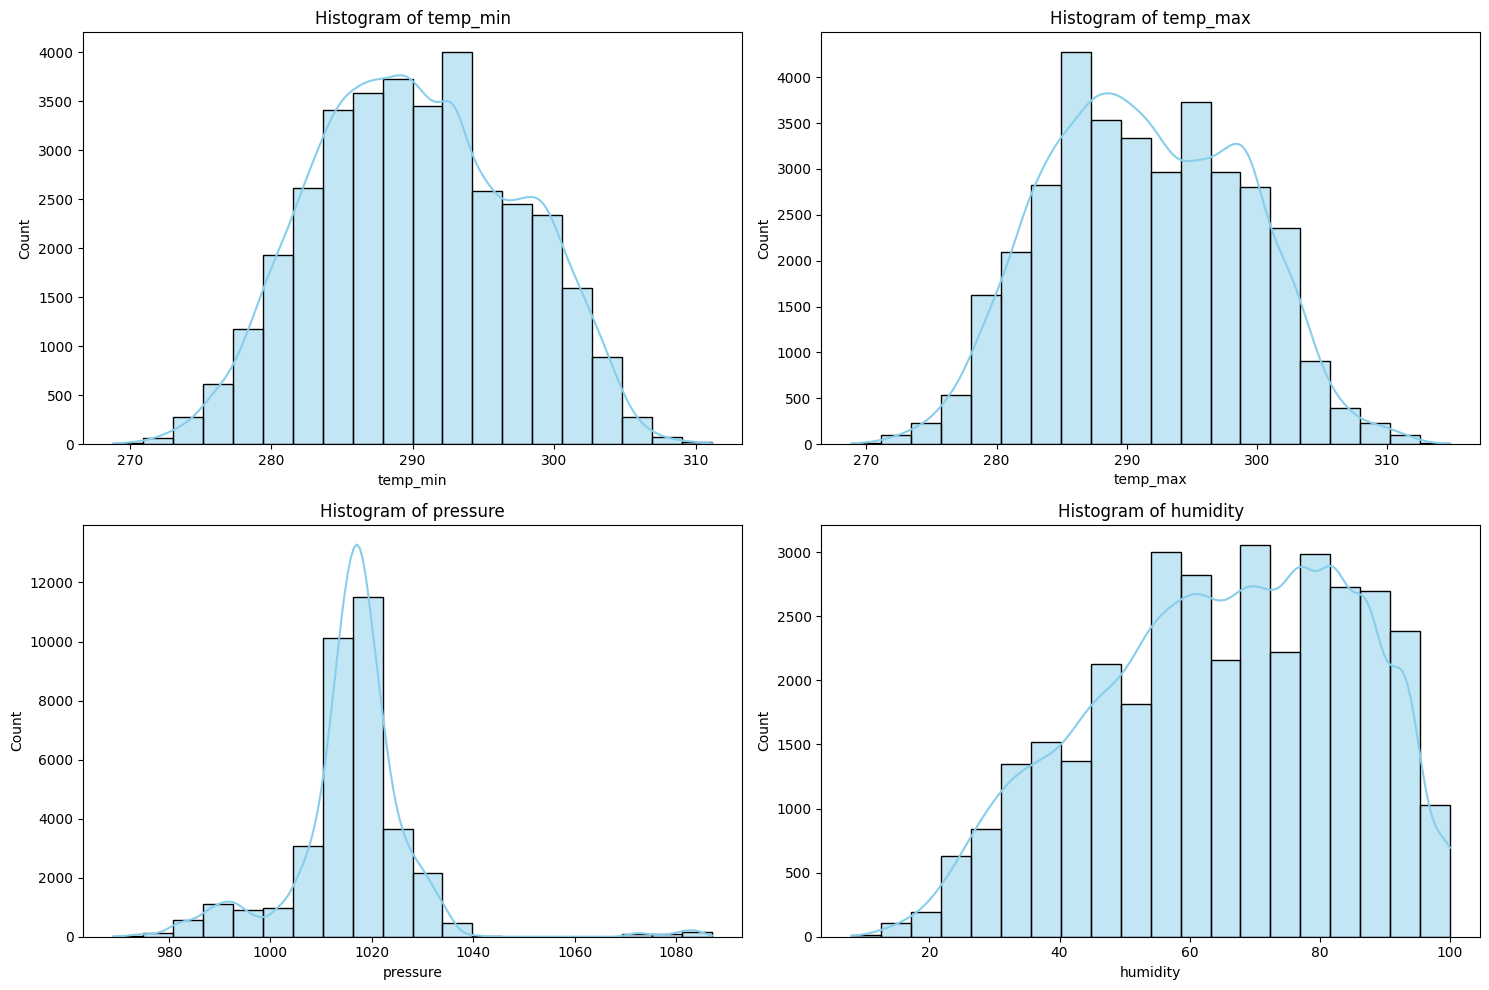

In [43]:
weather_columns = ['temp_min', 'temp_max', 'pressure', 'humidity']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through each weather variable and create histograms
for i, column in enumerate(weather_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_eda[column], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [44]:
df_eda.columns

Index(['date', 'year', 'month', 'week', 'day', 'hour', 'generation biomass',
       'generation fossil brown coal/lignite', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price actual', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'clouds_all', 'weather_main'],
      dtype='object')

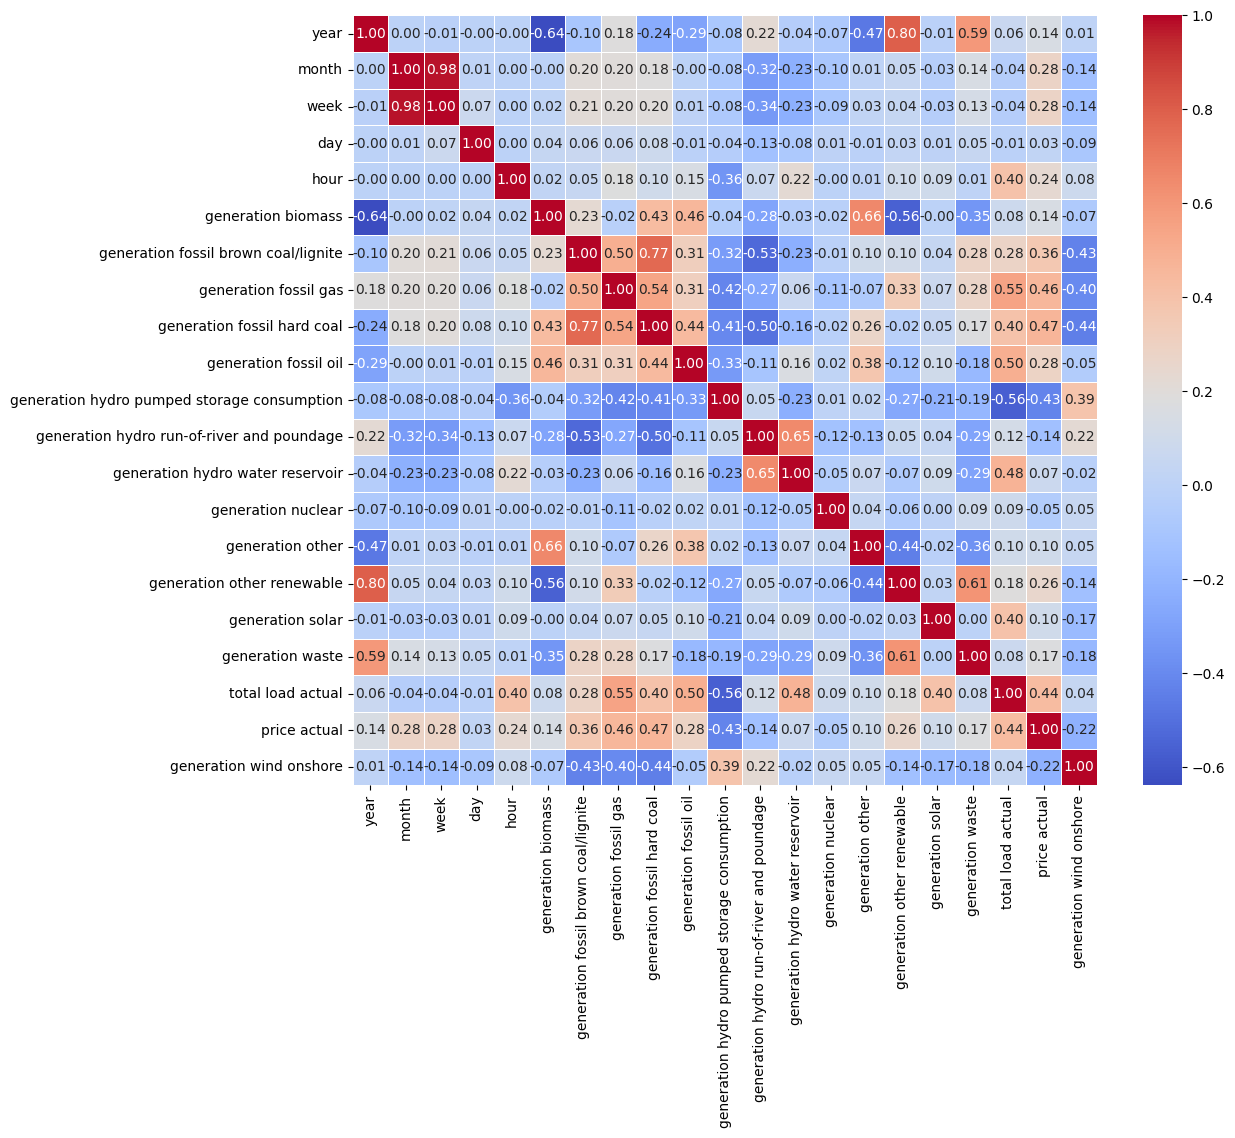

In [45]:
# selecting  columns for the subplots

numerical_columns = ['year', 'month', 'week', 'day', 'hour','generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
                    'generation fossil hard coal', 'generation fossil oil',
                    'generation hydro pumped storage consumption',
                    'generation hydro run-of-river and poundage', 'generation hydro water reservoir',
                    'generation nuclear', 'generation other', 'generation other renewable', 'generation solar',
                    'generation waste', 'total load actual', 'price actual', 'generation wind onshore']



# create a correlation matrix
correlation_matrix=df_eda[numerical_columns].corr()

# set up the matplotlib figure
plt.figure(figsize=(12,10))

# create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm',fmt='.2f',linewidth=0.5)

# show the plot
plt.show()

# FEATURE ENGINEERING

In [46]:
# list of generation of columns

generation_columns = ['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
                      'generation fossil hard coal', 'generation fossil oil',
                      'generation hydro pumped storage consumption',
                      'generation hydro run-of-river and poundage', 'generation hydro water reservoir',
                      'generation nuclear', 'generation other', 'generation other renewable', 'generation solar',
                      'generation waste', 'generation wind onshore']


# add a new colums total load generated by summing up all genderation columns

df_eda['total load generated']=df_eda[generation_columns].sum(axis=1)

# display the dataframe with new columns

df_eda.head()


,date,year,month,week,day,hour,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,weather_main,total load generated
0,2014-12-31,2014,12,1,31,23,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,270.475,270.475,1001,77,1,0,clear,28251.0
5,2015-01-01,2015,1,1,1,0,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,270.475,270.475,1001,77,1,0,clear,27818.0
10,2015-01-01,2015,1,1,1,1,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,269.686,269.686,1002,78,0,0,clear,26796.0
15,2015-01-01,2015,1,1,1,2,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,269.686,269.686,1002,78,0,0,clear,25223.0
20,2015-01-01,2015,1,1,1,3,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,269.686,269.686,1002,78,0,0,clear,24620.0


In [47]:
# create a new column 'demand supply difference'

df_eda['demand_supply_difference']=df_eda['total load generated'] - df_eda['total load actual']

In [48]:
df_eda[['date','hour','demand_supply_difference']].head()

,date,hour,demand_supply_difference
0,2014-12-31,23,2866.0
5,2015-01-01,0,3436.0
10,2015-01-01,1,4062.0
15,2015-01-01,2,3937.0
20,2015-01-01,3,4356.0


In [49]:
df_eda['shifted_demand_supply']=df_eda['demand_supply_difference'].shift(-1)

In [50]:
df_eda[['date','hour','shifted_demand_supply']].head()

,date,hour,shifted_demand_supply
0,2014-12-31,23,3436.0
5,2015-01-01,0,4062.0
10,2015-01-01,1,3937.0
15,2015-01-01,2,4356.0
20,2015-01-01,3,4326.0


In [51]:
df_eda[['date','hour','shifted_demand_supply']].tail()

,date,hour,shifted_demand_supply
178371,2018-12-31,18,-4522.0
178376,2018-12-31,19,-4084.0
178381,2018-12-31,20,-3053.0
178386,2018-12-31,21,-1850.0
178391,2018-12-31,22,NaN


In [52]:
# assuming that we want to remove the last row since building model it will cause issuee

df_eda=df_eda.drop(df_eda.index[-1])

In [53]:
df_eda.isnull().sum()

date                                            0
year                                            0
month                                           0
week                                            0
day                                             0
hour                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18


In [54]:
df_eda.dropna(inplace=True)

# MODEL BUILDING

In [55]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm





In [56]:
# assuming df_clean is your dataframe

x=df_eda[['month','week','day','hour',
            'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
            'generation fossil hard coal', 'generation fossil oil',
            'generation hydro pumped storage consumption',
            'generation hydro run-of-river and poundage', 'generation hydro water reservoir',
            'generation nuclear', 'generation other', 'generation other renewable', 'generation solar',
            'generation waste', 'generation wind onshore','temp_min', 'temp_max', 'pressure', 'humidity',
            'wind_speed', 'clouds_all','total load actual','price actual']]



y=df_eda['shifted_demand_supply']

In [57]:
# create transformer with 3 type of transformer

num_features=x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns


numeric_transformer=StandardScaler()
ohe_transformer=OneHotEncoder()


preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',ohe_transformer,cat_features),
        ('StanderScaler',numeric_transformer,num_features)
    ]
)

In [58]:
x=preprocessor.fit_transform(x)


In [59]:
x

array([[ 1.58762235, -1.70504637,  1.73511184, ..., -0.81063557,
        -0.72401436,  0.53031243],
       [-1.60276435, -1.70504637, -1.67548607, ..., -0.81063557,
        -0.94333757,  0.49576962],
       [-1.60276435, -1.70504637, -1.67548607, ..., -0.81063557,
        -1.30370112,  0.46475159],
       ...,
       [ 1.58762235, -1.70504637,  1.73511184, ..., -0.81063557,
         0.22718798,  1.2881394 ],
       [ 1.58762235, -1.70504637,  1.73511184, ..., -0.81063557,
        -0.13667425,  1.15701771],
       [ 1.58762235, -1.70504637,  1.73511184, ..., -0.81063557,
        -0.63304881,  0.84613242]])

In [60]:
y

0         3436.0
5         4062.0
10        3937.0
15        4356.0
20        4326.0
           ...  
178366   -4238.0
178371   -4522.0
178376   -4084.0
178381   -3053.0
178386   -1850.0
Name: shifted_demand_supply, Length: 34995, dtype: float64

In [61]:
# split the data

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=42)
x_train.shape,x_test.shape

((24496, 26), (10499, 26))

In [62]:
def evaluate_model(true, predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [63]:
import plotly.graph_objects as go

In [64]:
# create amodesl

models={
    'Linear Regression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'K-Neighbors Regressor':KNeighborsRegressor(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    'CatBoosting Regressor':CatBoostRegressor(verbose=False),
    'AdaBoost Regressor':AdaBoostRegressor()
}

In [65]:
result_df=pd.DataFrame(columns=['Model','Train RMSE','Train MAE','Train R2','Test RMSE','Test MAE','Test R2'])

In [66]:
lr=KNeighborsRegressor(n_neighbors=10)

lr.fit(x_train,y_train)

y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

In [67]:
np.isnan(x_train).sum()

0

In [ ]:
nlkj

In [68]:

for model_name,model in models.items():
    model.fit(x_train,y_train)


    # make Predictioin
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)


    # evaluate train and test dataset
    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)


    # append result to dataframe 

    result_df=result_df.append(
        {
            'Model':model_name,
            'Train RMSE':model_train_rmse,
            'Train MAE':model_train_mae,
            'Train R2':model_train_r2,
            'Test RMSE':model_test_rmse,
            'Test MAE':model_test_mae,
            'Test R2':model_test_r2
        },ignore_index=True)






C:\Users\sachin gavalkar\AppData\Local\Temp\ipykernel_17596\1891455221.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df=result_df.append(
C:\Users\sachin gavalkar\AppData\Local\Temp\ipykernel_17596\1891455221.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df=result_df.append(
C:\Users\sachin gavalkar\AppData\Local\Temp\ipykernel_17596\1891455221.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df=result_df.append(
C:\Users\sachin gavalkar\AppData\Local\Temp\ipykernel_17596\1891455221.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df=result_df.append(
C:\Users\sachin gavalkar\AppData\Loc

In [69]:
result_df

,Model,Train RMSE,Train MAE,Train R2,Test RMSE,Test MAE,Test R2
0,Linear Regression,998.712912,640.210717,0.853119,950.976148,625.625694,0.864817
1,Lasso,998.841261,640.672550,0.853082,951.267121,626.060531,0.864735
2,Ridge,998.713645,640.257485,0.853119,950.996733,625.681744,0.864811
3,K-Neighbors Regressor,972.204712,641.380560,0.860813,1188.842122,803.325745,0.788734
4,Decision Tree,0.000000,0.000000,1.000000,1491.865809,1006.106772,0.667309
5,Random Forest Regressor,391.439053,255.910698,0.977436,999.748329,676.191883,0.850596
6,XGBRegressor,493.399268,371.257592,0.964151,882.110084,582.555014,0.883687
7,CatBoosting Regressor,582.646550,426.875906,0.950009,803.650344,516.592815,0.903458
8,AdaBoost Regressor,1907.503679,1552.657594,0.464186,1925.831766,1543.963766,0.445606


In [70]:
x = df_eda[['month','week','day','hour',
            'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas',
            'generation fossil hard coal', 'generation fossil oil',
            'generation hydro pumped storage consumption',
            'generation hydro run-of-river and poundage', 'generation hydro water reservoir',
            'generation nuclear', 'generation other', 'generation other renewable', 'generation solar',
            'generation waste', 'generation wind onshore','temp_min', 'temp_max', 'pressure', 'humidity',
            'wind_speed', 'clouds_all','total load actual','price actual']]

y=df_eda['shifted_demand_supply']

# create columns transformer with 3 type of transforemers
num_features=x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns


numeric_transformer=StandardScaler()
ohe_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ('OneHotEncodder',ohe_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features),
    ]
)

x_transformed=preprocessor.fit_transform(x)

# split the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# build catboost regressor model
lr_model=CatBoostRegressor(verbose=False)
lr_model.fit(x_train,y_train)

# make Predictions
y_pred=lr_model.predict(x_test)

# model evaluation

In [71]:
# Evaluate the model

y_diff=y_test-y_pred

# calculate mae for positive and negative values separtely
positive_mae=mean_absolute_error(y_test[y_diff >=0],y_pred[y_diff>0])
negative_mae=mean_absolute_error(y_test[y_diff <0],y_pred[y_diff < 0])


# calculate overall mae and r-squared

overall_mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test,y_pred)

# print the results

print(f'MAE for positive values : {positive_mae}')
print(f'MAE for negative values : {negative_mae}')
print(f'Overall MAE : {overall_mae}')
print(f'R-Squared (R2) :{r2}')



MAE for positive values : 520.2697202773616
MAE for negative values : 512.8565466292956
Overall MAE : 516.5634864952206
R-Squared (R2) :0.9034644370086722


In [72]:
# Get the feature names after one-hot encoding
feature_names = preprocessor.named_transformers_['OneHotEncoder'].get_feature_names_out(cat_features)

# Combine feature names with numeric feature names
all_feature_names = np.concatenate([ num_features,feature_names])

# Add constant term to feature names
all_feature_names = ['const'] + all_feature_names.tolist()

# Add constant term to X_train
x_train = sm.add_constant(x_train)

# Fit the OLS model
model = sm.OLS(y_train, x_train)
results = model.fit()

# Print the summary with meaningful variable names
print(results.summary(xname=all_feature_names))

KeyError: 'OneHotEncoder'

In [73]:
# get the feature names after one hot encoding

features_names=preprocessor.named_tr['OneHotEncoder'].get_feature_names_out(cat_features)


# combine feature names with numeric featues names
all_feature_names=np.concatenate([num_features,features_names])

# add constant term to feature names
all_feature_names=['const'] + all_feature_names.tolist()

# add constant term to x_train
x_train=sm.add_constant(x_train)

# fit the OLS model

model=sm.OLS(y_train,x_train)
result=model.fit()

# print the summary with meaningfull variable names

print(result.summary(xname=all_feature_names))

AttributeError: 'ColumnTransformer' object has no attribute 'named_tr'

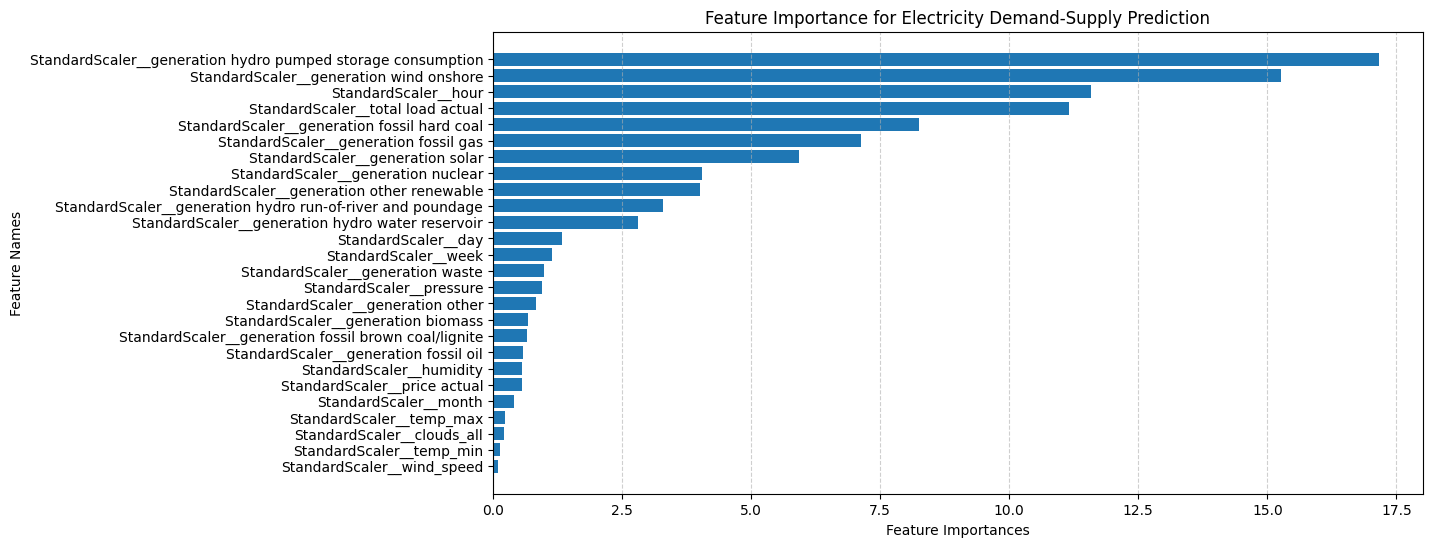

In [74]:
# Get Feature importances from the model
feature_importances=lr_model.get_feature_importance(prettified=False)

# get feature names (considering potential transformation)
feature_names=preprocessor.get_feature_names_out()   # After Column Transformation

# Sort Feature Importances and names together by importances (descending)

sorted_idx=np.argsort(feature_importances)
feature_importances=feature_importances[sorted_idx]
feature_names=feature_names[sorted_idx]


# Define plot size and create a bar chart

plt.figure(figsize=(12,6))
plt.barh(range(len(feature_names)),feature_importances,align='center')
plt.yticks(range(len(feature_names)),feature_names)
plt.xlabel('Feature Importances')
plt.ylabel('Feature Names')
plt.title('Feature Importance for Electricity Demand-Supply Prediction')
plt.grid(axis='x',linestyle='--',alpha=0.6)

plt.show()

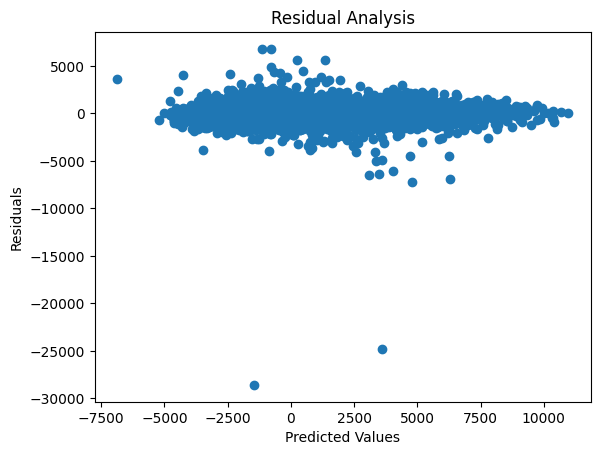

In [75]:
residuals=y_test-y_pred
plt.scatter(y_pred,residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

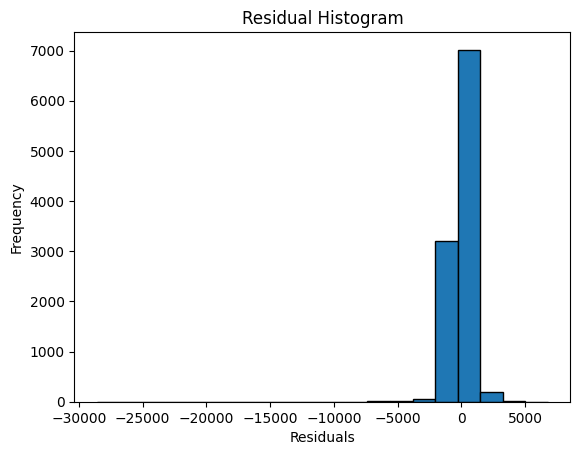

In [76]:
plt.hist(residuals,bins=20,edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

In [77]:

# for gridserach cv

from sklearn.model_selection import GridSearchCV

param_grid={
    'depth':[4,6,8],
    'learning_rate':[0.05,0.1,0.2],
    'iterations':[25,50,100]
}

grid_search=GridSearchCV(estimator=CatBoostRegressor(),param_grid=param_grid,cv=5)
grid_search.fit(x_train,y_train)

best_params=grid_search.best_params_





0:	learn: 2543.7648442	total: 7.68ms	remaining: 184ms
1:	learn: 2482.5156129	total: 16.6ms	remaining: 191ms
2:	learn: 2426.7992587	total: 28.6ms	remaining: 210ms
3:	learn: 2375.8239186	total: 40.7ms	remaining: 214ms
4:	learn: 2328.5131467	total: 51.4ms	remaining: 205ms
5:	learn: 2283.5565726	total: 62.6ms	remaining: 198ms
6:	learn: 2240.4473560	total: 75.8ms	remaining: 195ms
7:	learn: 2202.4213568	total: 88.7ms	remaining: 189ms
8:	learn: 2166.3349738	total: 101ms	remaining: 180ms
9:	learn: 2132.7078566	total: 113ms	remaining: 170ms
10:	learn: 2101.2815329	total: 126ms	remaining: 160ms
11:	learn: 2069.8328242	total: 138ms	remaining: 150ms
12:	learn: 2040.8467688	total: 151ms	remaining: 139ms
13:	learn: 2013.9484982	total: 162ms	remaining: 127ms
14:	learn: 1988.8343982	total: 174ms	remaining: 116ms
15:	learn: 1964.9314774	total: 186ms	remaining: 104ms
16:	learn: 1942.4473338	total: 199ms	remaining: 93.5ms
17:	learn: 1922.2555647	total: 212ms	remaining: 82.6ms
18:	learn: 1903.5695375	tota

In [78]:
best_params

{'depth': 8, 'iterations': 100, 'learning_rate': 0.2}

In [79]:
# import pool

from catboost import Pool


x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3,random_state=42)

# check the data type of each feature in x_train
non_numeric_feature=x_train.select_dtypes(exclude=['number']).columns

# if there are non-numeric features, preprocess them 

if len(non_numeric_feature) >0:
    # remove non-numeric feature or handle them approximately
    x_train=x_train.drop(columns=non_numeric_feature)
    x_val=x_val.drop(columns=non_numeric_feature)



# create pools for training and validations
train_pool=Pool(x_train,y_train)
val_pool=Pool(x_val,y_val)

# create a CatBoostRegressor model
lr_model=CatBoostRegressor(iterations=700,depth=10,learning_rate=0.05,loss_function='MAE')

# train the model

lr_model.fit(train_pool,eval_set=val_pool,verbose=100)

0:	learn: 1915.2448116	test: 1901.9750910	best: 1901.9750910 (0)	total: 237ms	remaining: 2m 45s
100:	learn: 737.6200398	test: 791.2361067	best: 791.2361067 (100)	total: 22.3s	remaining: 2m 12s
200:	learn: 568.6597343	test: 663.6046971	best: 663.6046971 (200)	total: 43s	remaining: 1m 46s
300:	learn: 471.0377758	test: 600.1639923	best: 600.1639923 (300)	total: 1m 2s	remaining: 1m 23s
400:	learn: 412.5625196	test: 567.1437684	best: 567.1437684 (400)	total: 1m 27s	remaining: 1m 5s
500:	learn: 366.5110341	test: 547.3948243	best: 547.3948243 (500)	total: 1m 49s	remaining: 43.5s
600:	learn: 332.8773225	test: 534.1697891	best: 534.1697891 (600)	total: 2m 9s	remaining: 21.3s
699:	learn: 306.4006182	test: 525.6328754	best: 525.6328754 (699)	total: 2m 28s	remaining: 0us

bestTest = 525.6328754
bestIteration = 699



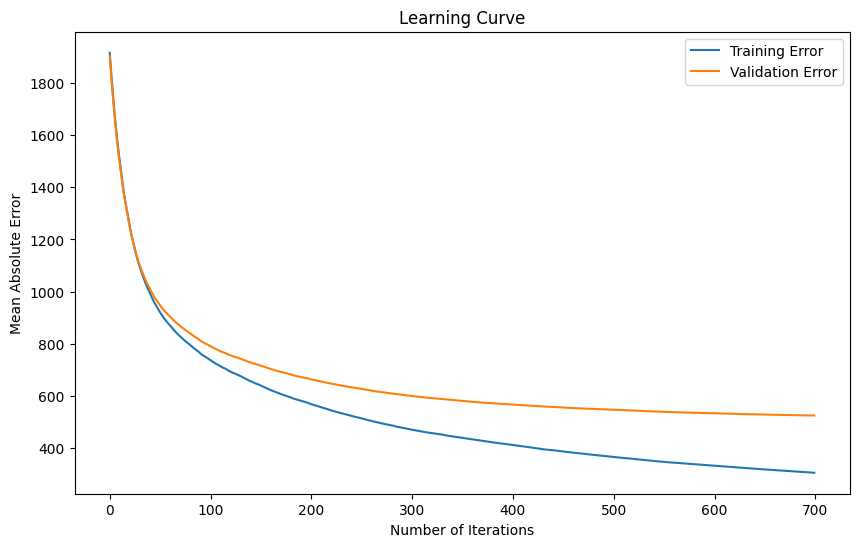

In [80]:
# get the training and validation errors

train_error=lr_model.get_evals_result()['learn']['MAE']
val_error=lr_model.get_evals_result()['validation']['MAE']

# plot the learning curve
plt.figure(figsize=(10,6))
plt.plot(train_error,label='Training Error')
plt.plot(val_error,label='Validation Error')
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Absolute Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [81]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
52685,950.0,806.556978,143.443022
97216,1461.0,769.833132,691.166868
145285,-3025.0,-2498.290497,-526.709503
110692,-2817.0,-2718.270815,-98.729185
116563,-4687.0,-4228.690527,-458.309473
...,...,...,...
129651,5682.0,7360.560342,-1678.560342
82599,5639.0,6102.091255,-463.091255
78418,2918.0,2186.137875,731.862125
27458,613.0,1735.759360,-1122.759360


In [82]:
# count positive and negative instances in the actual values

actual_positive_count=(pred_df['Actual Value'] >0).sum()
actual_negative_count=(pred_df['Actual Value'] <0).sum()

# count of Positive and negative instance in predicted values

predicted_positive_count=(pred_df['Predicted Value'] > 0).sum()
predicted_negative_count=(pred_df['Predicted Value'] < 0).sum()


print('Actual Values :')
print(f'Positive Count :{actual_positive_count}')
print(f'Negative Count : {actual_negative_count}')


print('\nPredicted Value:')
print(f'Positive Count : {predicted_positive_count}')
print(f'Negative Count : {predicted_negative_count}')



Actual Values :
Positive Count :4395
Negative Count : 6102

Predicted Value:
Positive Count : 4256
Negative Count : 6243


<AxesSubplot: xlabel='shifted_demand_supply'>

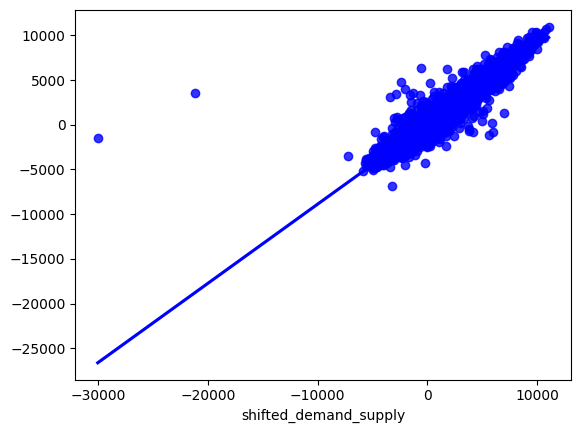

In [83]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='blue')


In [84]:
df_eda.to_csv('final_model.csv',index=False)

In [85]:
# save the trained model
lr_model.save_model('catboost_model.cbm')